In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 

warnings.filterwarnings('ignore')

In [3]:
data = np.linspace(25,100 , 90 ,dtype=int)
salary = np.array(data)

In [4]:
salary

array([ 25,  25,  26,  27,  28,  29,  30,  30,  31,  32,  33,  34,  35,
        35,  36,  37,  38,  39,  40,  41,  41,  42,  43,  44,  45,  46,
        46,  47,  48,  49,  50,  51,  51,  52,  53,  54,  55,  56,  57,
        57,  58,  59,  60,  61,  62,  62,  63,  64,  65,  66,  67,  67,
        68,  69,  70,  71,  72,  73,  73,  74,  75,  76,  77,  78,  78,
        79,  80,  81,  82,  83,  83,  84,  85,  86,  87,  88,  89,  89,
        90,  91,  92,  93,  94,  94,  95,  96,  97,  98,  99, 100])

In [5]:
# five point summary:
# minimum value , 25th percentile , 50th percentile , 75th percentile , 100th pecentile

In [6]:
 np.quantile(salary,[0.25, 0.50 , 0.75 ,1])

array([ 43.25,  62.  ,  80.75, 100.  ])

In [7]:
df = pd.DataFrame(salary ,columns=['salary'])

In [8]:
df.describe() # This will also give the same 5 point summary as first second third and fourth quartile.

,salary
count,90.000000
mean,62.011111
std,22.020162
min,25.000000
25%,43.250000
50%,62.000000
75%,80.750000
max,100.000000


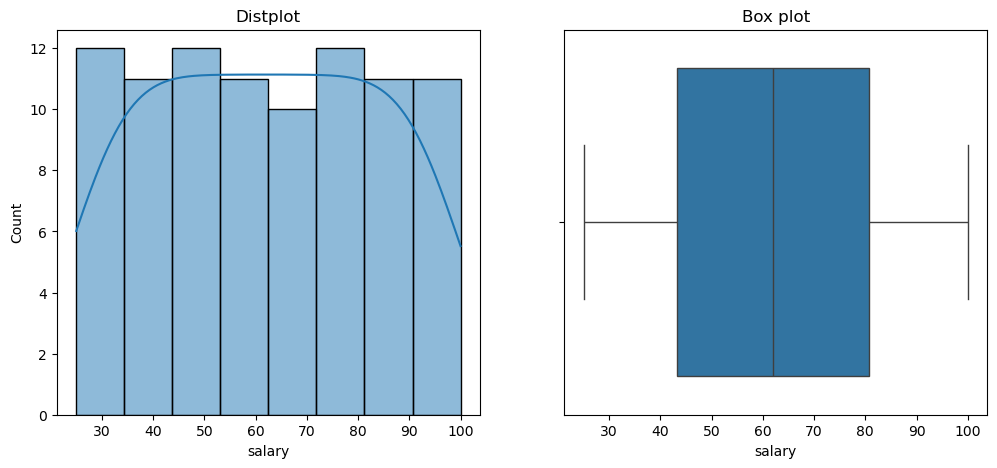

In [9]:
# Ways to check for outliers are:
    # 1. Distplot
    # 2 .Box whisker plot

# Create a figure with size 12x5 inches
plt.figure(figsize=(12,5))

# Create first subplot for distribution plot
plt.subplot(1,2,1)
# Plot histogram with kernel density estimation for salary column
sns.histplot(df['salary'],kde=True)
plt.title("Distplot")

# Create second subplot for box plot
plt.subplot(1,2,2)
# Create box plot showing salary distribution
sns.boxplot(data = df , x='salary')
plt.title("Box plot")
plt.show()

In [10]:
# Since the abve data was created from numpy library so its a normally distributed data hence there are very less
# number of outliers as seen in the above plot

In [120]:
import pandas as pd

# Creating a dataset with outliers
salaries = [
    45000, 47000, 48000, 50000, 52000, 49000, 51000, 53000, 55000, 50500, 
    46000, 48000, 47500, 52500, 51500, 50500, 54000, 47000, 45500, 52500, 
    49000, 50000, 51000, 49500, 50500, 52000, 53000, 50000, 48500, 47000, 
    52500, 51000, 48000, 49000, 51500, 50000, 52000, 50500, 53500, 54000, 
    77500, 80000, 81000, 82000, 83000, 80000,  # Outliers
]

# Creating a DataFrame
df = pd.DataFrame({'Salary': salaries})


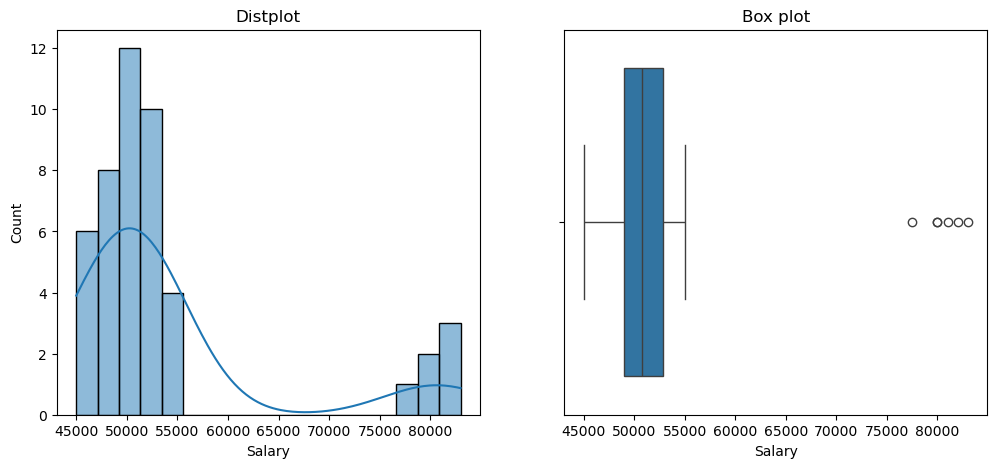

In [122]:
# Create a figure with size 12x5 inches
plt.figure(figsize=(12,5))

# Create first subplot for distribution plot
plt.subplot(1,2,1)
# Plot histogram with kernel density estimation for salary column
sns.histplot(df['Salary'],kde=True)
plt.title("Distplot")

# Create second subplot for box plot
plt.subplot(1,2,2)
# Create box plot showing salary distribution
sns.boxplot(data = df , x='Salary')
plt.title("Box plot")
plt.show()

In [176]:
# In box plot we need to find upperfence inorder to deal with outliers:
# lower fence = Q1 - 1.5*IQR (IQR inter quartile range = Q3 - Q1)
# upper fence = Q3 - 1.5*IQR (IQR inter quartile range = Q3 - Q1)
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

In [178]:
df_filtered = df[(df.Salary >= lower_fence) & (df.Salary <= upper_fence)]

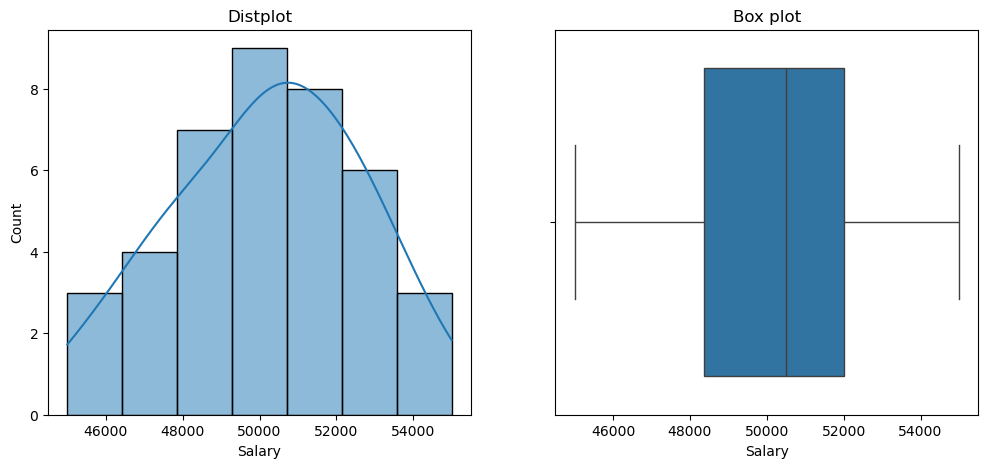

In [182]:
# Create a figure with size 12x5 inches
plt.figure(figsize=(12,5))

# Create first subplot for distribution plot
plt.subplot(1,2,1)
# Plot histogram with kernel density estimation for salary column
sns.histplot(df_filtered['Salary'],kde=True)
plt.title("Distplot")

# Create second subplot for box plot3
plt.subplot(1,2,2)
# Create box plot showing salary distribution
sns.boxplot(data = df_filtered , x='Salary')
plt.title("Box plot")
plt.show()

In [16]:
# In the above data the outliers were removed.

In [184]:
# imputation with mean and median 
# Assuming df, upper_fence, and lower_fence are already defined
mean_salary = df['Salary'].mean()  # Store mean before imputation

# Replace outliers with the mean salary
df['Salary_Imputed'] = np.where(
    (df['Salary'] >= upper_fence) | (df['Salary'] <= lower_fence), 
    mean_salary, 
    df['Salary']
)

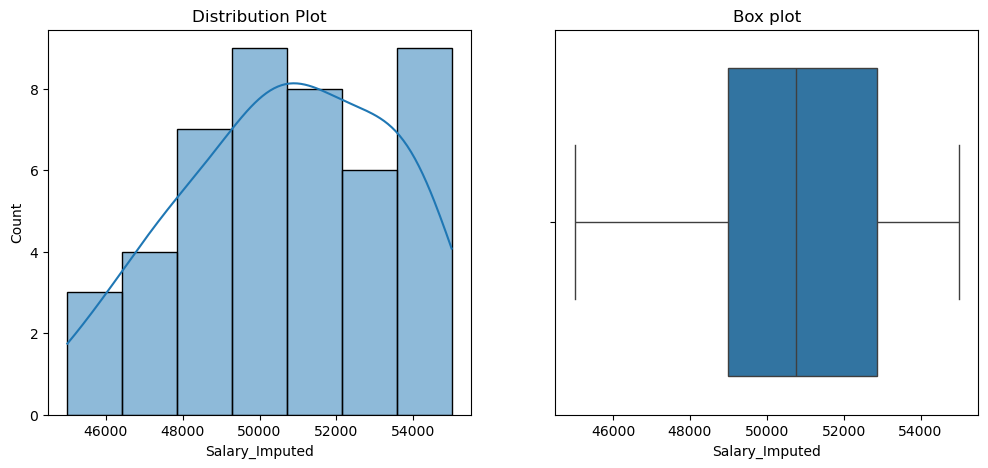

In [186]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

sns.histplot(df['Salary_Imputed'], kde=True)
plt.title("Distribution Plot")

plt.subplot(1,2,2)

sns.boxplot(data = df , x='Salary_Imputed')
plt.title("Box plot")
plt.show()

In [242]:
# The similar above can be done for median of the salary data as well.
# capping the outliers 
# capping >> replaces with the nerest value which is not an outlier.
lower_cap = df['Salary'].quantile(0.05)
upper_cap = df['Salary'].quantile(0.85)

In [244]:
lower_cap


46250.0

In [246]:
upper_cap

54250.0

In [248]:
df['Salary_Capped'] = np.where(
    df.Salary  < lower_cap, lower_cap,  # Cap high outliers
    np.where(df.Salary > upper_cap, upper_cap, df['Salary'])  # Cap low outliers
)
df

,Salary,Salary_Imputed,Salary_Capped
0,45000,45000.000000,46250.0
1,47000,47000.000000,47000.0
2,48000,48000.000000,48000.0
3,50000,50000.000000,50000.0
4,52000,52000.000000,52000.0
5,49000,49000.000000,49000.0
6,51000,51000.000000,51000.0
7,53000,53000.000000,53000.0
8,55000,55000.000000,54250.0
9,50500,50500.000000,50500.0


Text(0.5, 1.0, 'Box-plot')

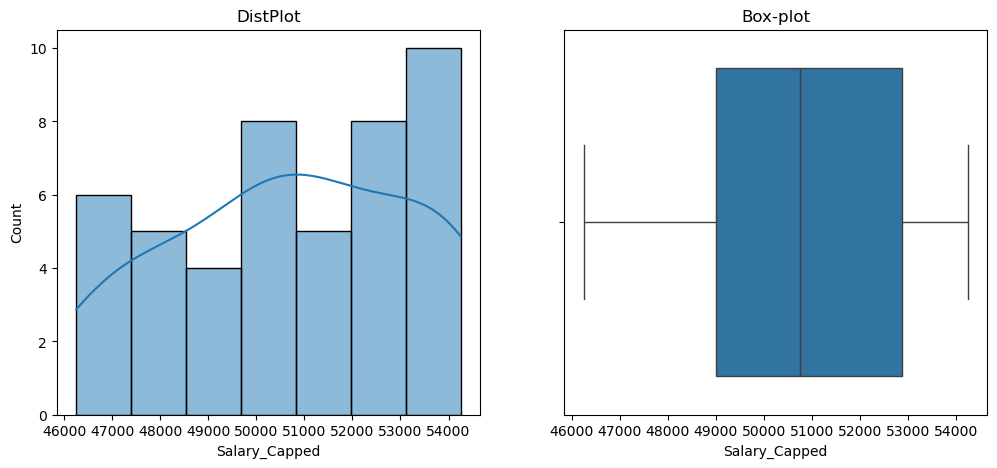

In [250]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Salary_Capped'] , kde = True)
plt.title("DistPlot")


plt.subplot(1,2,2)
sns.boxplot(data = df , x = 'Salary_Capped')
plt.title("Box-plot")

In [252]:
df

,Salary,Salary_Imputed,Salary_Capped
0,45000,45000.000000,46250.0
1,47000,47000.000000,47000.0
2,48000,48000.000000,48000.0
3,50000,50000.000000,50000.0
4,52000,52000.000000,52000.0
5,49000,49000.000000,49000.0
6,51000,51000.000000,51000.0
7,53000,53000.000000,53000.0
8,55000,55000.000000,54250.0
9,50500,50500.000000,50500.0
